In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [13]:
# Conect dataframe
from google.colab import drive
drive.mount('/content/drive')
my_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labs Unidad 4/marketing_customer_analysis.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Display the first few rows
print(my_data.head())

# Display the shape of the dataframe
print(my_data.shape)

# Display information about the dataframe
print(my_data.info())


  customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies  \
0                             5                         0                   1

In [14]:
# Rename columns
my_data.columns = my_data.columns.str.lower().str.replace(' ', '_')

In [16]:
# Fix the date
my_data['effective_to_date'] = pd.to_datetime(my_data['effective_to_date'])

<ipython-input-17-f128340eb6cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = my_data.corr()


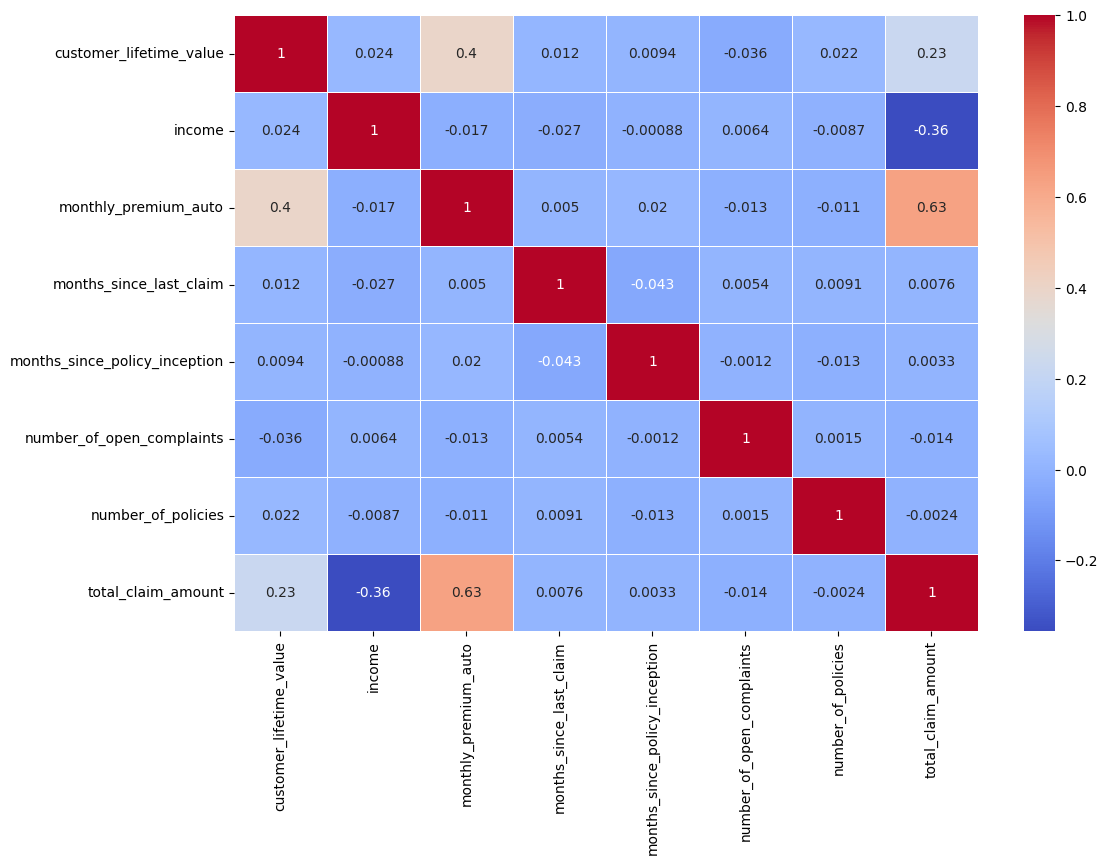

In [17]:
# Correlation matrix
correlation_matrix = my_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


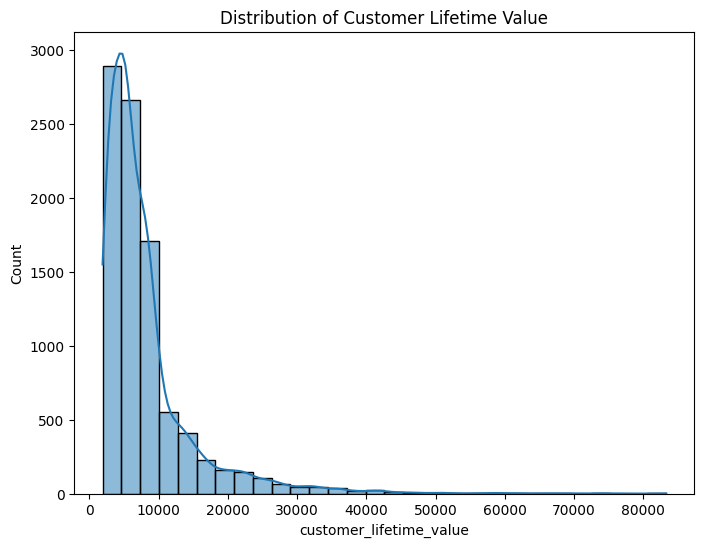

In [18]:
# Continous variable
plt.figure(figsize=(8, 6))
sns.histplot(my_data['customer_lifetime_value'], bins=30, kde=True)
plt.title('Distribution of Customer Lifetime Value')
plt.show()


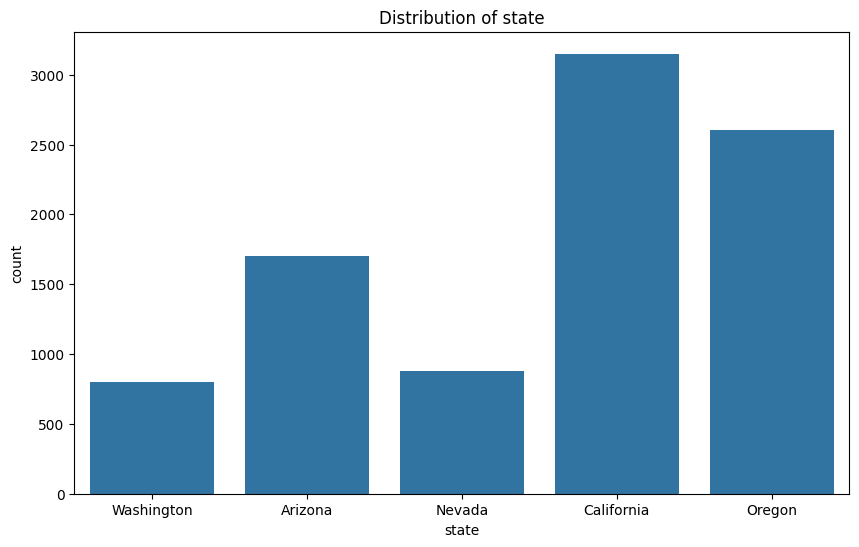

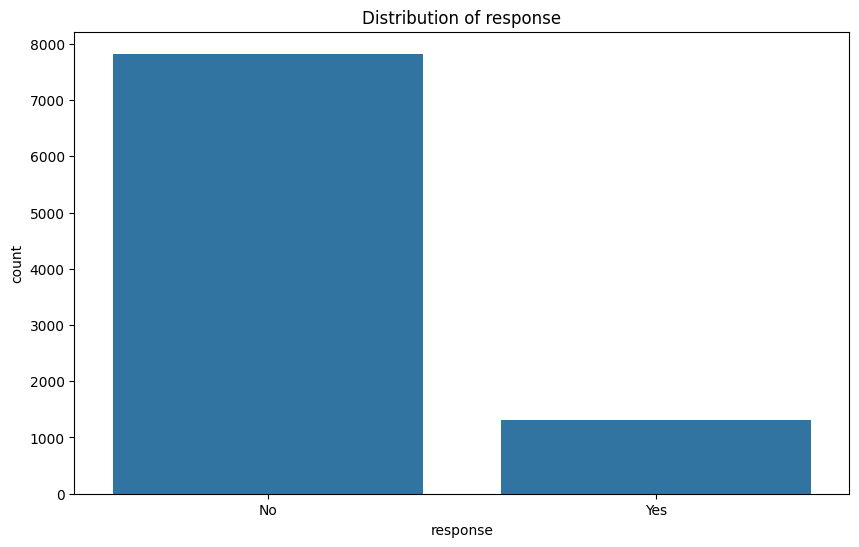

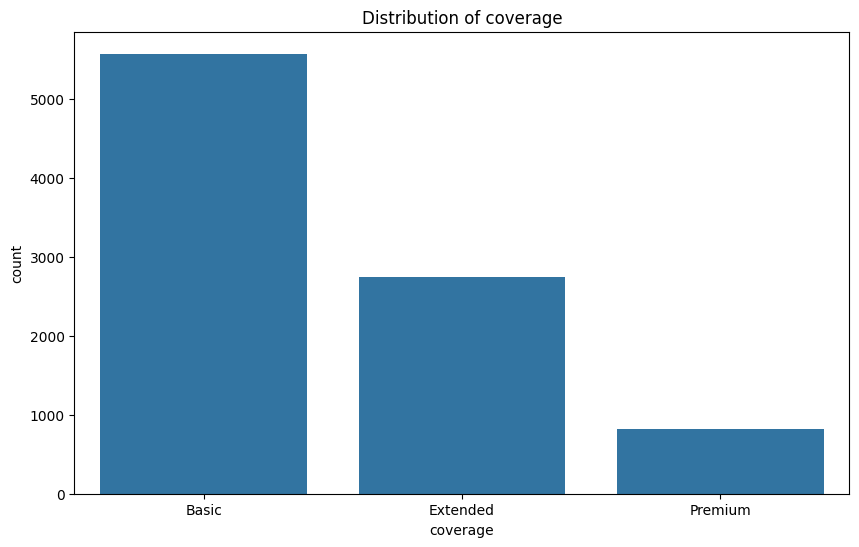

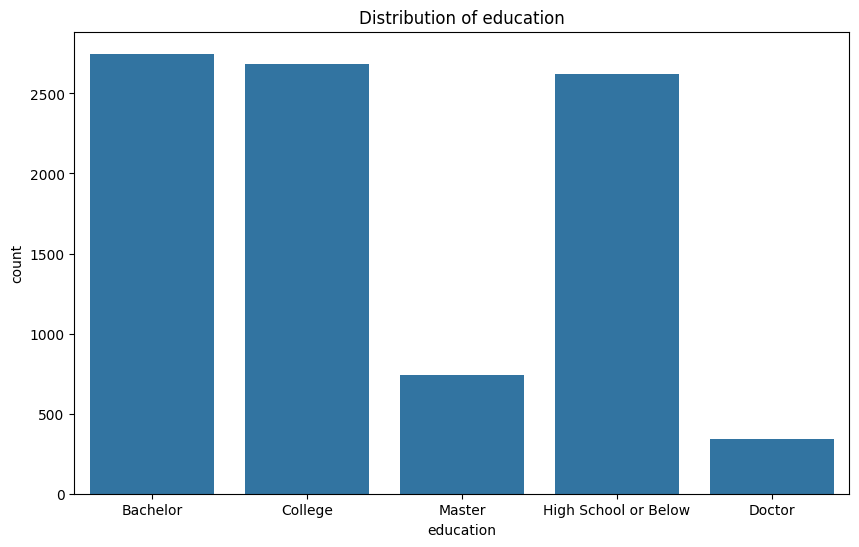

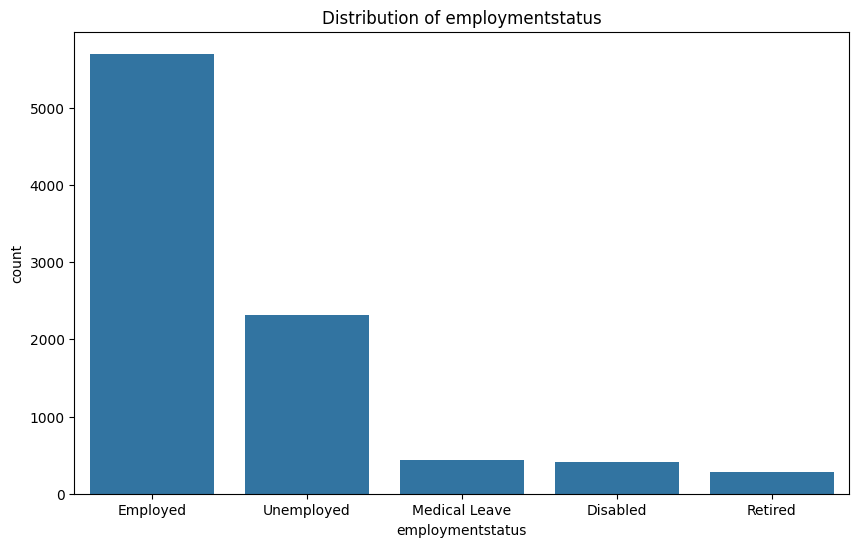

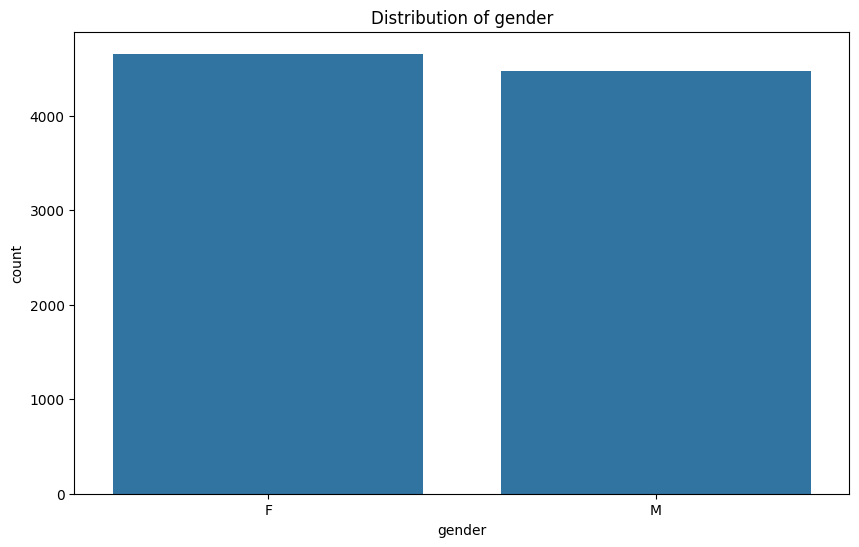

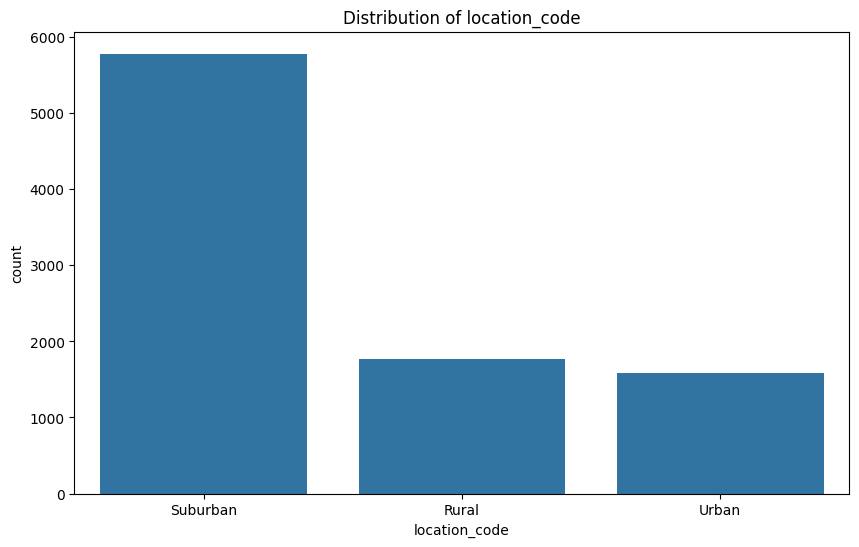

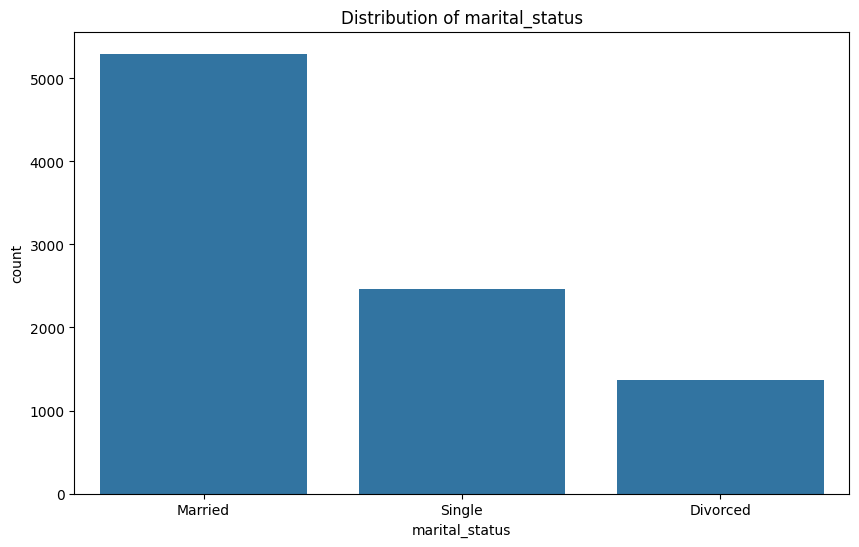

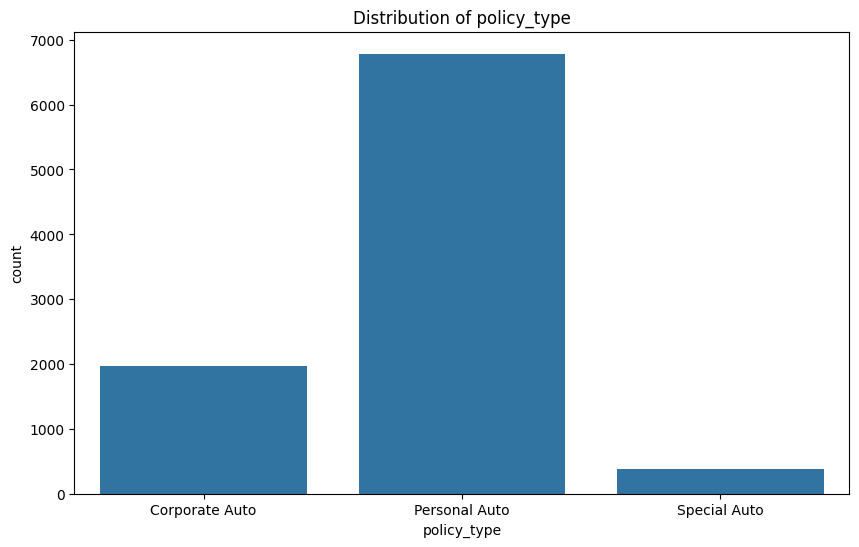

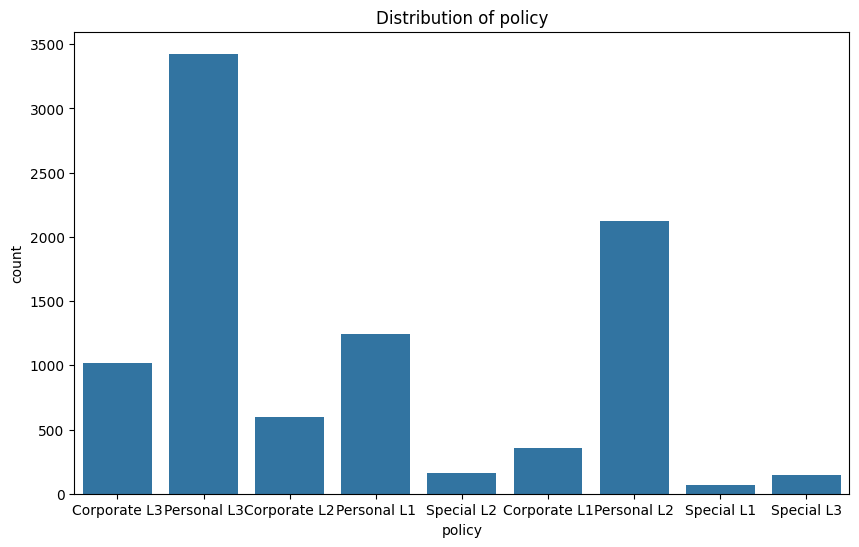

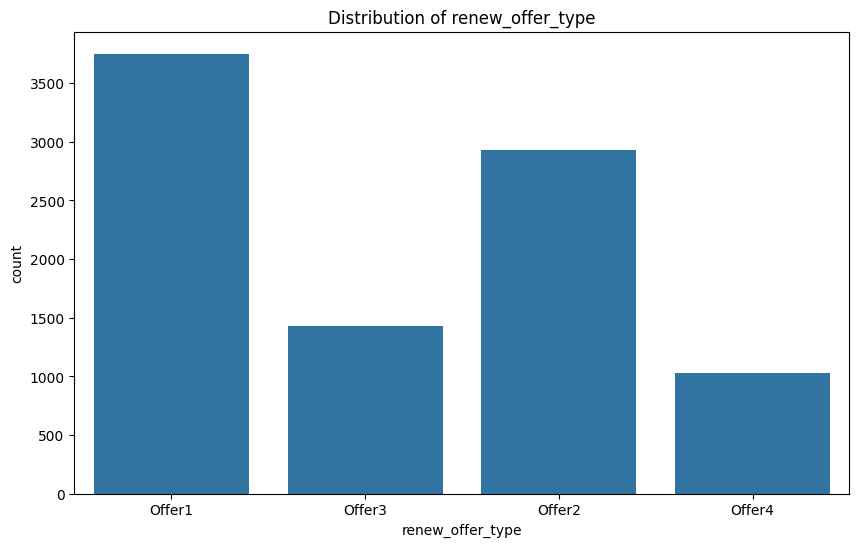

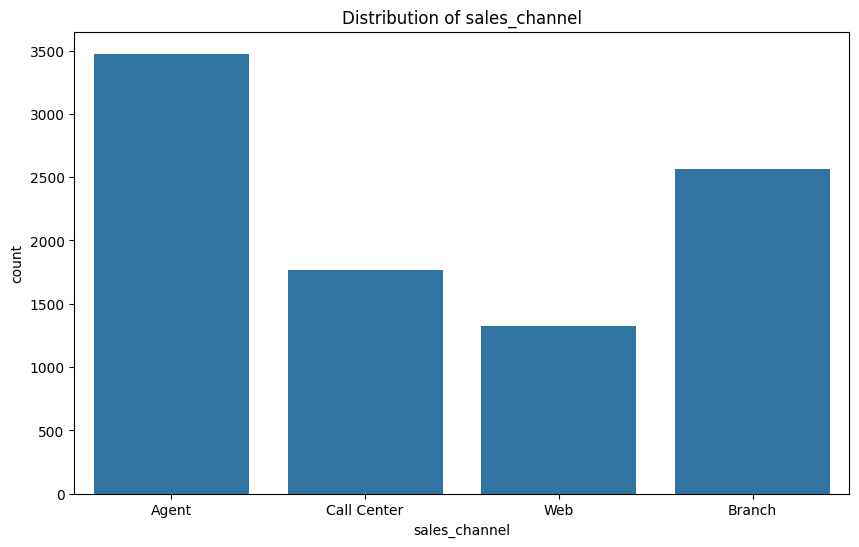

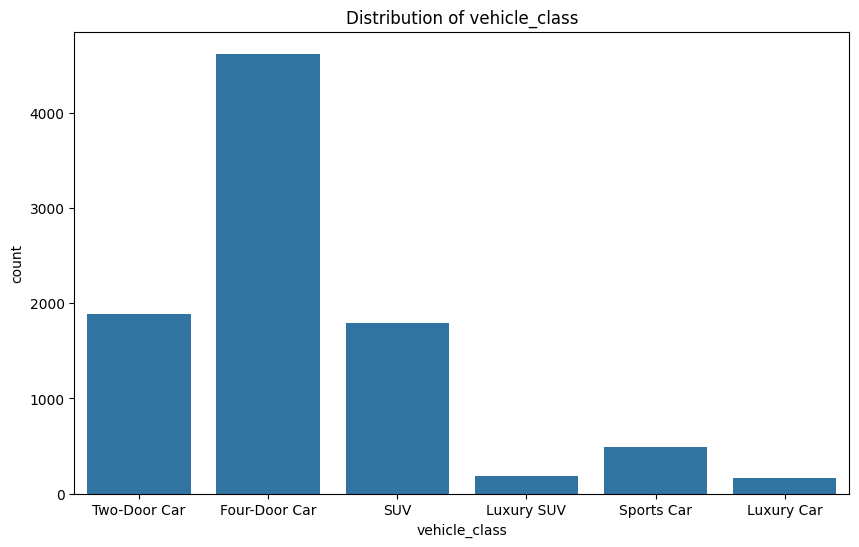

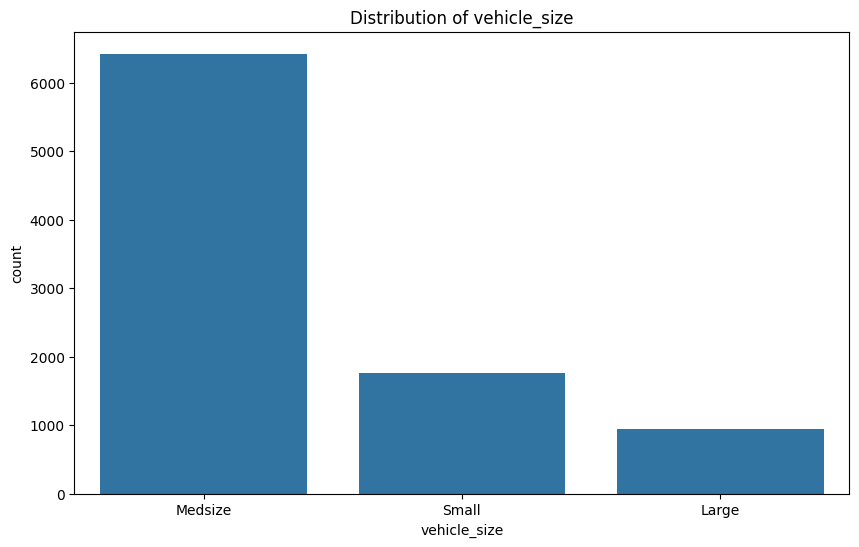

In [22]:
# Delete customer_id
my_data.drop('customer', axis=1, inplace=True)

# Plot categorical variables
for column in my_data.select_dtypes('object').columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=my_data)
    plt.title(f'Distribution of {column}')
    plt.show()

# It is usually deleted because customers are unique identifiers and do not provide meaningful information for analysis. Keeping it in the analysis might lead to overfitting or misinterpretation.

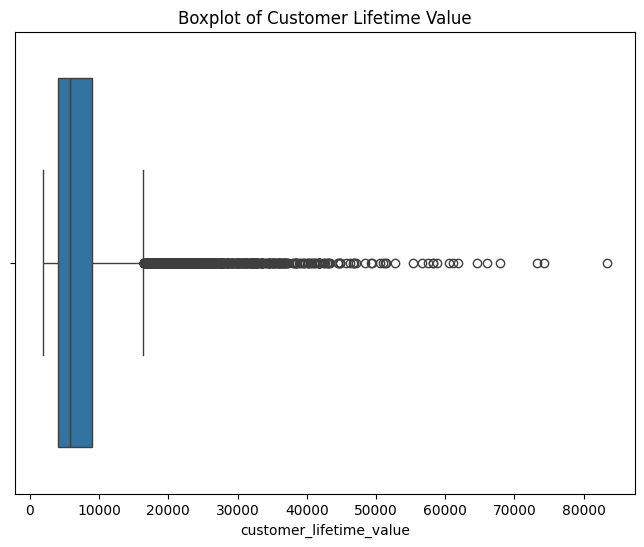

In [23]:
# Look for outliers in countinous variables
plt.figure(figsize=(8, 6))
sns.boxplot(x=my_data['customer_lifetime_value'])
plt.title('Boxplot of Customer Lifetime Value')
plt.show()


In [24]:
# Check for NaN values
print(my_data.isnull().sum())


state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64
